
# Neural Network
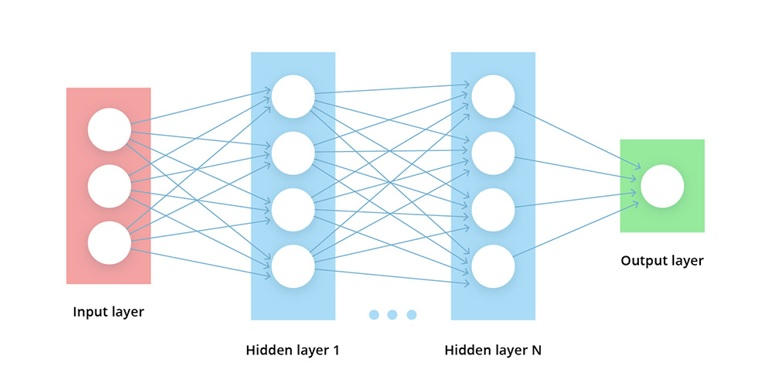

## components of newral network
- weight(가중치) = 네트워크의 출력이 예상 출력 값에 얼마나 근접하는지에 영향을 미칩니다. 
- bias(편향) = 활성화 함수의 출력과 의도한 출력 간의 차이를 나타냅니다.
$$
y = f(w_1x_1 + w_2x_2 + b)
$$
$$
y = f(\sum{w_ix_i}+b)
$$

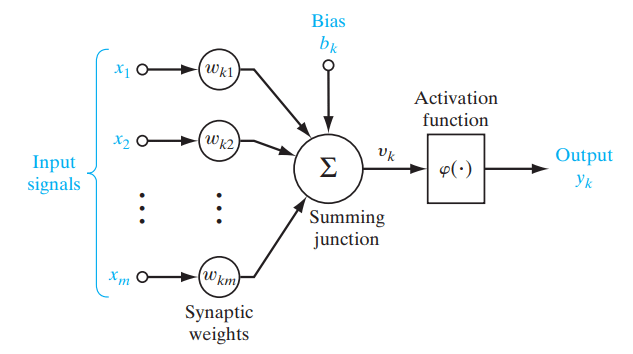

# Bulid a newral network
- 네트워크 공부 필요 (GPU, TPU 등)
- 코드 한줄씩 어떤 네트워크를 사용할지 선택할 수 있다 

In [ ]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get a hardware device for training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## Define the class

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # in_featurers와 out_features를 벡터 형태로 length를 정해줌 
            nn.Linear(28*28, 512),
            # active function 정의 
            nn.ReLU(),
            # 2번째 hidden layer는 첫번째 out과 세번째 input 숫자와 같아야 한다. 
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        # hidden layer는 input으로 vector 형태만 받을 수 있으므로 flatten이 필요하다. 
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# Newral Network를 만들고 device에 적용, action은 총 2번이다
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [ ]:
# flatten은 차원을 나타내는 마지막 두 개의 숫자만 계산 (batch 차원은 계산하지 않음)
X = torch.rand(1,28,28, device=device)
X.shape

torch.Size([1, 28, 28])

In [ ]:
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
# 28*28이 10으로 바뀐 것을 알 수 있다. 
logits.shape

torch.Size([1, 10])

In [ ]:
# 8번째 값이 가장 크다. 
logits

tensor([[0.0027, 0.0000, 0.0236, 0.0484, 0.1019, 0.0000, 0.0934, 0.0000, 0.1245,
         0.0418]], grad_fn=<ReluBackward0>)

In [ ]:
y_pred = pred_probab.argmax(1)
print(f'Predicted class : {y_pred}')

Predicted class : tensor([8])


## Weight and Bias

In [ ]:
model.linear_relu_stack

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
  (5): ReLU()
)

In [ ]:
# (512, 28*28)
print(f'First Linear weights : {model.linear_relu_stack[0].weight.shape} \n') 
print('-'*50)
# (512)
print(f'First Linear bias : {model.linear_relu_stack[0].bias.shape}')

First Linear weights : torch.Size([512, 784]) 

--------------------------------------------------
First Linear weights : torch.Size([512])


## Model layers

In [ ]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

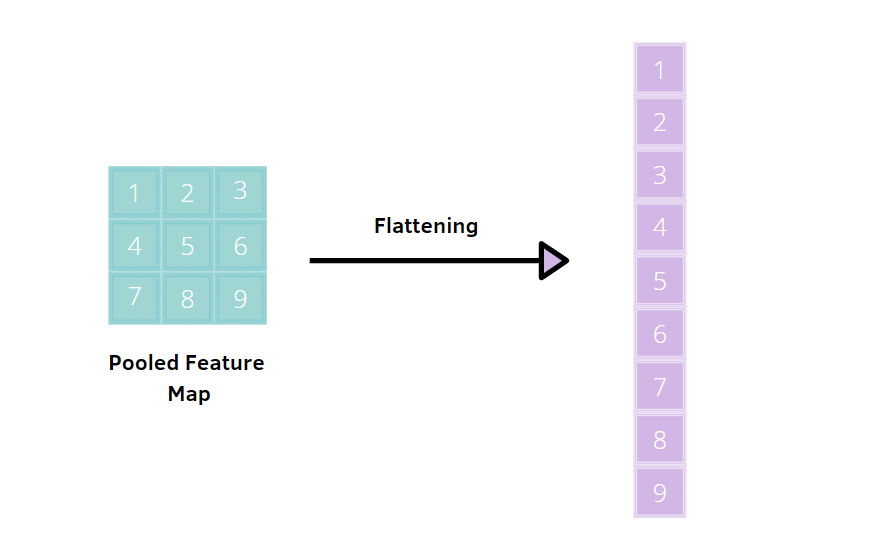

In [ ]:
flatten = nn.Flatten()
# (3, 28, 28)
flat_image = flatten(input_image)
# (3, 28*28)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

In [ ]:
# output 값은 자유롭게 수정 가능 
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU
- Linear output x : weight*input+bias
- ReLU : f(x) = 0 if x < 0 else x

In [ ]:
print(f'Before ReLU : {hidden1} \n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU : {hidden1}')

Before ReLU : tensor([[ 0.6448,  0.3362,  0.0917,  0.0080, -0.4821, -0.1061, -0.2866,  0.0374,
         -0.2639,  0.1518, -0.1500,  0.4742, -0.4131,  0.4978, -0.4685, -0.0158,
          0.0244,  0.1393, -0.0505,  0.3748],
        [ 0.4282,  0.2217,  0.2307, -0.0499, -0.9517, -0.4866, -0.4970,  0.0797,
         -0.2111,  0.0635, -0.1868,  0.5334, -0.2718,  0.0878, -0.4689, -0.1165,
          0.3737,  0.0058, -0.2025,  0.0259],
        [ 0.0294,  0.4736,  0.0326, -0.1437, -0.4314,  0.1510, -0.1748,  0.3184,
         -0.3368,  0.1402, -0.0411,  0.4304, -0.4150, -0.0897, -0.5055, -0.2246,
          0.0277,  0.0485, -0.3496,  0.3289]], grad_fn=<AddmmBackward0>) 


After ReLU : tensor([[0.6448, 0.3362, 0.0917, 0.0080, 0.0000, 0.0000, 0.0000, 0.0374, 0.0000,
         0.1518, 0.0000, 0.4742, 0.0000, 0.4978, 0.0000, 0.0000, 0.0244, 0.1393,
         0.0000, 0.3748],
        [0.4282, 0.2217, 0.2307, 0.0000, 0.0000, 0.0000, 0.0000, 0.0797, 0.0000,
         0.0635, 0.0000, 0.5334, 0.0000, 0.0878, 0

### nn.Sequential

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20 ,10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

logits.shape

torch.Size([3, 10])

### nn.Softmax
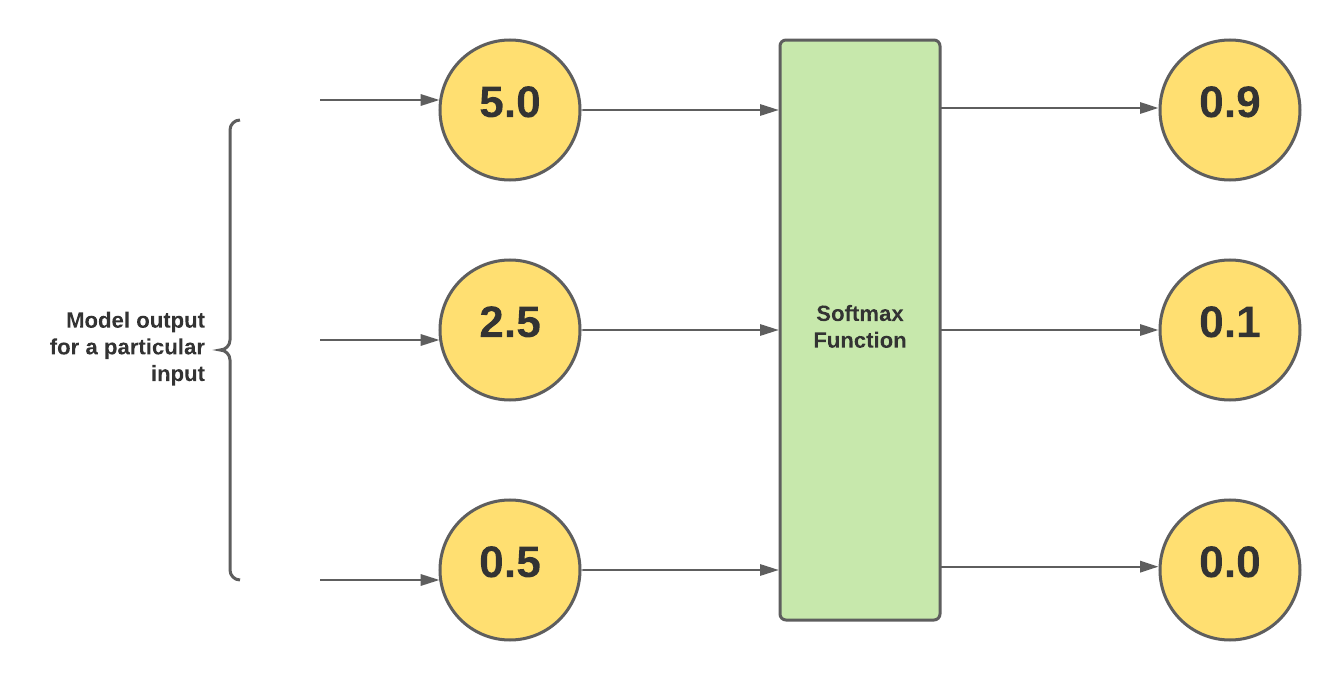

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab.shape

torch.Size([3, 10])

## Model parameters

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0140, -0.0062, -0.0087,  ..., -0.0300, -0.0255,  0.0032],
        [-0.0290,  0.0238,  0.0027,  ..., -0.0298,  0.0202, -0.0071]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0294,  0.0312], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0275,  0.0327, -0.0007,  ...,  0.0150, -0.0289,  0.0411],
        [-0.0336, -0.0356,  0.0163,  ...,  0.0297, -0.0276,  0.0358]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re